<a href="https://colab.research.google.com/github/amalsalilan/IPL_Infographics_Data_Analytics_-_Data_Visualization_Infosys_Internship_Oct2024/blob/D_Aasritha_Reddy/final_notebook_ipl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***01-Data_Import_and_Overview***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('all_season_details.csv')

<ipython-input-2-376d8e14a58b>:1: DtypeWarning: Columns (25,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('all_season_details.csv')


In [ ]:
print("The shape of dataset is:",df.shape)
print("The size of dataset is:",df.size)
print("The dimensions of dataset is:",df.ndim)

The shape of dataset is: (236891, 45)
The size of dataset is: 10660095
The dimensions of dataset is: 2


In [ ]:
pd.options.display.max_columns = None

In [ ]:
df.head(5)

comment_id  season  match_id match_name home_team away_team  \
0         110  2023.0   1359475   GT v CSK        GT       CSK   
1         120  2023.0   1359475   GT v CSK        GT       CSK   
2         130  2023.0   1359475   GT v CSK        GT       CSK   
3         140  2023.0   1359475   GT v CSK        GT       CSK   
4         150  2023.0   1359475   GT v CSK        GT       CSK   

  current_innings  innings_id  over  ball  runs  \
0             CSK           1     1     1     0   
1             CSK           1     1     2     1   
2             CSK           1     1     3     0   
3             CSK           1     1     4     1   
4             CSK           1     1     5     0   

                             shortText  isBoundary  isWide  isNoball  \
0     Mohammed Shami to Conway, no run       False   False     False   
1  Mohammed Shami to Conway, 1 leg bye       False   False     False   
2    Mohammed Shami to Gaikwad, no run       False   False     False   
3     Mohammed Shami to Gaikwad, 1 run       False   False     False   
4     Mohammed Shami to Conway, no run       False   False     False   

   batsman1_id    batsman1_name  batsman1_runs  batsman1_balls  bowler1_id  \
0       379140     Devon Conway              0               1      481896   
1       379140     Devon Conway              0               2      481896   
2      1060380  Ruturaj Gaikwad              0               1      481896   
3      1060380  Ruturaj Gaikwad              1               2      481896   
4       379140     Devon Conway              0               3      481896   

     bowler1_name  bowler1_overs  bowler1_maidens  bowler1_runs  bowler1_wkts  \
0  Mohammed Shami            0.1                0             0             0   
1  Mohammed Shami            0.2                0             0             0   
2  Mohammed Shami            0.3                0             0             0   
3  Mohammed Shami            0.4                0             1             0   
4  Mohammed Shami            0.5                0             1             0   

  batsman2_id    batsman2_name  batsman2_runs  batsman2_balls  bowler2_id  \
0     1060380  Ruturaj Gaikwad              0               0         NaN   
1     1060380  Ruturaj Gaikwad              0               0         NaN   
2      379140     Devon Conway              0               2         NaN   
3      379140     Devon Conway              0               2         NaN   
4     1060380  Ruturaj Gaikwad              1               2         NaN   

  bowler2_name  bowler2_overs  bowler2_maidens  bowler2_runs  bowler2_wkts  \
0          NaN            NaN              NaN           NaN           NaN   
1          NaN            NaN              NaN           NaN           NaN   
2          NaN            NaN              NaN           NaN           NaN   
3          NaN            NaN              NaN           NaN           NaN   
4          NaN            NaN              NaN           NaN           NaN   

   wicket_id wkt_batsman_name wkt_bowler_name  wkt_batsman_runs  \
0        NaN              NaN             NaN               NaN   
1        NaN              NaN             NaN               NaN   
2        NaN              NaN             NaN               NaN   
3        NaN              NaN             NaN               NaN   
4        NaN              NaN             NaN               NaN   

   wkt_batsman_balls wkt_text isRetiredHurt  \
0                NaN      NaN         False   
1                NaN      NaN         False   
2                NaN      NaN         False   
3                NaN      NaN         False   
4                NaN      NaN         False   

                                                text  \
0  nice and full, angling and perhaps swinging in...   
1  Conway shuffles across off, and shimmies out a...   
2  good length, angling in at off and then straig...   
3  shorter and slanting into middle and leg, Gaik...   
4  Shami hit

# ***02-EDA_Basic_Statistics***

In [ ]:
df.columns

Index(['comment_id', 'season', 'match_id', 'match_name', 'home_team',
       'away_team', 'current_innings', 'innings_id', 'over', 'ball', 'runs',
       'shortText', 'isBoundary', 'isWide', 'isNoball', 'batsman1_id',
       'batsman1_name', 'batsman1_runs', 'batsman1_balls', 'bowler1_id',
       'bowler1_name', 'bowler1_overs', 'bowler1_maidens', 'bowler1_runs',
       'bowler1_wkts', 'batsman2_id', 'batsman2_name', 'batsman2_runs',
       'batsman2_balls', 'bowler2_id', 'bowler2_name', 'bowler2_overs',
       'bowler2_maidens', 'bowler2_runs', 'bowler2_wkts', 'wicket_id',
       'wkt_batsman_name', 'wkt_bowler_name', 'wkt_batsman_runs',
       'wkt_batsman_balls', 'wkt_text', 'isRetiredHurt', 'text', 'preText',
       'postText'],
      dtype='object')

In [ ]:
print("The info is:",df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236891 entries, 0 to 236890
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   comment_id         236891 non-null  int64  
 1   season             236408 non-null  float64
 2   match_id           236891 non-null  int64  
 3   match_name         236891 non-null  object 
 4   home_team          236891 non-null  object 
 5   away_team          236891 non-null  object 
 6   current_innings    236891 non-null  object 
 7   innings_id         236891 non-null  int64  
 8   over               236891 non-null  int64  
 9   ball               236891 non-null  int64  
 10  runs               236891 non-null  int64  
 11  shortText          236891 non-null  object 
 12  isBoundary         236891 non-null  bool   
 13  isWide             236891 non-null  bool   
 14  isNoball           236891 non-null  bool   
 15  batsman1_id        236891 non-null  int64  
 16  ba

In [ ]:
print("Describe:",df.describe())

Describe:           comment_id         season      match_id    innings_id  \
count  236891.000000  236408.000000  2.368910e+05  236891.00000   
mean    86516.652511    2015.769686  8.829370e+05       1.48353   
std     79552.545567       4.541915  3.473551e+05       0.49973   
min       110.000000    2008.000000  3.359820e+05       1.00000   
25%     18040.000000    2012.000000  5.483330e+05       1.00000   
50%     29020.000000    2016.000000  9.809190e+05       1.00000   
75%    118060.000000    2020.000000  1.216512e+06       2.00000   
max    219080.000000    2023.000000  1.370353e+06       2.00000   

                over           ball           runs   batsman1_id  \
count  236891.000000  236891.000000  236891.000000  2.368910e+05   
mean       10.168006       3.484130       1.317838  2.550300e+05   
std         5.658562       1.707449       1.612179  2.986244e+05   
min         1.000000       1.000000       0.000000  4.292000e+03   
25%         5.000000       2.000000       0.00

In [ ]:
print("\nMissing Values in Each Column:\n", df.isnull().sum())


Missing Values in Each Column:
 comment_id                0
season                  483
match_id                  0
match_name                0
home_team                 0
away_team                 0
current_innings           0
innings_id                0
over                      0
ball                      0
runs                      0
shortText                 0
isBoundary                0
isWide                    0
isNoball                  0
batsman1_id               0
batsman1_name             0
batsman1_runs             0
batsman1_balls            0
bowler1_id                0
bowler1_name              0
bowler1_overs             0
bowler1_maidens           0
bowler1_runs              0
bowler1_wkts              0
batsman2_id               0
batsman2_name             2
batsman2_runs             0
batsman2_balls            0
bowler2_id            12521
bowler2_name          12521
bowler2_overs         12521
bowler2_maidens       12521
bowler2_runs          12521
bowler2_wkts   

In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Summary of Categorical Columns:")
print(df[categorical_cols].describe())

Summary of Categorical Columns:
       match_name home_team away_team current_innings               shortText  \
count      236891    236891    236891          236891                  236891   
unique        159        15        15              15                   86645   
top      DC v KKR       CSK        MI              DC  Sharma to Kohli, 1 run   
freq         5783     28667     29890           35751                      94   

       batsman1_name         bowler1_name  batsman2_id   batsman2_name  \
count         236891               236891       236891          236889   
unique           629                  499          776             619   
top      Virat Kohli  Ravichandran Ashwin        28235  Shikhar Dhawan   
freq            5686                 4325         5207            5691   

               bowler2_name wkt_batsman_name   wkt_bowler_name  \
count                224370            11595             11595   
unique                  493              585               

In [ ]:
df.nunique()

comment_id              380
season                   16
match_id                999
match_name              159
home_team                15
away_team                15
current_innings          15
innings_id                2
over                     20
ball                      7
runs                      8
shortText             86645
isBoundary                2
isWide                    2
isNoball                  2
batsman1_id             627
batsman1_name           629
batsman1_runs           156
batsman1_balls           74
bowler1_id              498
bowler1_name            499
bowler1_overs            36
bowler1_maidens           3
bowler1_runs             70
bowler1_wkts              7
batsman2_id             776
batsman2_name           619
batsman2_runs           138
batsman2_balls           71
bowler2_id              492
bowler2_name            493
bowler2_overs            23
bowler2_maidens           3
bowler2_runs             68
bowler2_wkts              6
wicket_id               583
wkt_batsman_name        585
wkt_bowler_name         431
wkt_batsman_runs        119
wkt_batsman_balls        68
wkt_text              11595
isRetiredHurt             2
text                 231170
preText               42434
postText              18910
dtype: int64

In [ ]:
#shows only missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 season                  483
batsman2_name             2
bowler2_id            12521
bowler2_name          12521
bowler2_overs         12521
bowler2_maidens       12521
bowler2_runs          12521
bowler2_wkts          12521
wicket_id            225296
wkt_batsman_name     225296
wkt_bowler_name      225296
wkt_batsman_runs     225296
wkt_batsman_balls    225296
wkt_text             225296
isRetiredHurt             1
text                   1330
preText              191440
postText             217447
dtype: int64


In [ ]:
threshold = len(df) / 2

In [ ]:
columns_to_drop=df.columns[df.isnull().sum() > threshold]
print("Columns with more than 50% missing values:", columns_to_drop.tolist())

Columns with more than 50% missing values: ['wicket_id', 'wkt_batsman_name', 'wkt_bowler_name', 'wkt_batsman_runs', 'wkt_batsman_balls', 'wkt_text', 'preText', 'postText']


In [ ]:
df.dtypes

comment_id             int64
season               float64
match_id               int64
match_name            object
home_team             object
away_team             object
current_innings       object
innings_id             int64
over                   int64
ball                   int64
runs                   int64
shortText             object
isBoundary              bool
isWide                  bool
isNoball                bool
batsman1_id            int64
batsman1_name         object
batsman1_runs          int64
batsman1_balls         int64
bowler1_id             int64
bowler1_name          object
bowler1_overs        float64
bowler1_maidens        int64
bowler1_runs           int64
bowler1_wkts           int64
batsman2_id           object
batsman2_name         object
batsman2_runs          int64
batsman2_balls         int64
bowler2_id           float64
bowler2_name          object
bowler2_overs        float64
bowler2_maidens      float64
bowler2_runs         float64
bowler2_wkts         float64
wicket_id            float64
wkt_batsman_name      object
wkt_bowler_name       object
wkt_batsman_runs     float64
wkt_batsman_balls    float64
wkt_text              object
isRetiredHurt         object
text                  object
preText               object
postText              object
dtype: object

In [ ]:
#correlation can be applied only for numerical datatypes
numerical_data = df.select_dtypes(include=['float64', 'int64'])
print("\nCorrelation Matrix for Numerical Features:")
print(numerical_data.corr())


Correlation Matrix for Numerical Features:
                   comment_id    season  match_id  innings_id      over  \
comment_id           1.000000  0.008185  0.007093    0.300493  0.793143   
season               0.008185  1.000000  0.987370    0.001225  0.009037   
match_id             0.007093  0.987370  1.000000    0.000485  0.008253   
innings_id           0.300493  0.001225  0.000485    1.000000 -0.042725   
over                 0.793143  0.009037  0.008253   -0.042725  1.000000   
ball                -0.009557  0.000657  0.000605   -0.004053 -0.012463   
runs                 0.056263  0.027155  0.028727   -0.006730  0.083259   
batsman1_id          0.029170  0.601746  0.584195    0.008880  0.032494   
batsman1_runs        0.255926  0.051040  0.054429   -0.015278  0.333293   
batsman1_balls       0.273065  0.009476  0.010797   -0.020470  0.344259   
bowler1_id           0.009805  0.661090  0.649647    0.004829  0.012154   
bowler1_overs        0.599305  0.014324  0.012441   -0.0

# ***03-Data_Cleaning***

In [ ]:
df_cleaning= df.drop(columns=['preText', 'postText','text'])

In [ ]:
df_cleaning['batsman2_id'] = pd.to_numeric(df_cleaning['batsman2_id'], errors='coerce')
df_cleaning.head(5)

comment_id  season  match_id match_name home_team away_team  \
0         110  2023.0   1359475   GT v CSK        GT       CSK   
1         120  2023.0   1359475   GT v CSK        GT       CSK   
2         130  2023.0   1359475   GT v CSK        GT       CSK   
3         140  2023.0   1359475   GT v CSK        GT       CSK   
4         150  2023.0   1359475   GT v CSK        GT       CSK   

  current_innings  innings_id  over  ball  runs  \
0             CSK           1     1     1     0   
1             CSK           1     1     2     1   
2             CSK           1     1     3     0   
3             CSK           1     1     4     1   
4             CSK           1     1     5     0   

                             shortText  isBoundary  isWide  isNoball  \
0     Mohammed Shami to Conway, no run       False   False     False   
1  Mohammed Shami to Conway, 1 leg bye       False   False     False   
2    Mohammed Shami to Gaikwad, no run       False   False     False   
3     Mohammed Shami to Gaikwad, 1 run       False   False     False   
4     Mohammed Shami to Conway, no run       False   False     False   

   batsman1_id    batsman1_name  batsman1_runs  batsman1_balls  bowler1_id  \
0       379140     Devon Conway              0               1      481896   
1       379140     Devon Conway              0               2      481896   
2      1060380  Ruturaj Gaikwad              0               1      481896   
3      1060380  Ruturaj Gaikwad              1               2      481896   
4       379140     Devon Conway              0               3      481896   

     bowler1_name  bowler1_overs  bowler1_maidens  bowler1_runs  bowler1_wkts  \
0  Mohammed Shami            0.1                0             0             0   
1  Mohammed Shami            0.2                0             0             0   
2  Mohammed Shami            0.3                0             0             0   
3  Mohammed Shami            0.4                0             1             0   
4  Mohammed Shami            0.5                0             1             0   

   batsman2_id    batsman2_name  batsman2_runs  batsman2_balls  bowler2_id  \
0    1060380.0  Ruturaj Gaikwad              0               0         NaN   
1    1060380.0  Ruturaj Gaikwad              0               0         NaN   
2     379140.0     Devon Conway              0               2         NaN   
3     379140.0     Devon Conway              0               2         NaN   
4    1060380.0  Ruturaj Gaikwad              1               2         NaN   

  bowler2_name  bowler2_overs  bowler2_maidens  bowler2_runs  bowler2_wkts  \
0          NaN            NaN              NaN           NaN           NaN   
1          NaN            NaN              NaN           NaN           NaN   
2          NaN            NaN              NaN           NaN           NaN   
3          NaN            NaN              NaN           NaN           NaN   
4          NaN            NaN              NaN           NaN           NaN   

   wicket_id wkt_batsman_name wkt_bowler_name  wkt_batsman_runs  \
0        NaN              NaN             NaN               NaN   
1        NaN              NaN             NaN               NaN   
2        NaN              NaN             NaN               NaN   
3        NaN              NaN             NaN               NaN   
4        NaN              NaN             NaN               NaN   

   wkt_batsman_balls wkt_text isRetiredHurt  
0                NaN      NaN         False  
1                NaN      NaN         False  
2                NaN      NaN         False  
3                NaN      NaN         False  
4                NaN      NaN         False

In [ ]:
df_cleaning.dropna(subset=['season', 'batsman2_name'], inplace=True)
df_cleaning.head(5)

comment_id  season  match_id match_name home_team away_team  \
0         110  2023.0   1359475   GT v CSK        GT       CSK   
1         120  2023.0   1359475   GT v CSK        GT       CSK   
2         130  2023.0   1359475   GT v CSK        GT       CSK   
3         140  2023.0   1359475   GT v CSK        GT       CSK   
4         150  2023.0   1359475   GT v CSK        GT       CSK   

  current_innings  innings_id  over  ball  runs  \
0             CSK           1     1     1     0   
1             CSK           1     1     2     1   
2             CSK           1     1     3     0   
3             CSK           1     1     4     1   
4             CSK           1     1     5     0   

                             shortText  isBoundary  isWide  isNoball  \
0     Mohammed Shami to Conway, no run       False   False     False   
1  Mohammed Shami to Conway, 1 leg bye       False   False     False   
2    Mohammed Shami to Gaikwad, no run       False   False     False   
3     Mohammed Shami to Gaikwad, 1 run       False   False     False   
4     Mohammed Shami to Conway, no run       False   False     False   

   batsman1_id    batsman1_name  batsman1_runs  batsman1_balls  bowler1_id  \
0       379140     Devon Conway              0               1      481896   
1       379140     Devon Conway              0               2      481896   
2      1060380  Ruturaj Gaikwad              0               1      481896   
3      1060380  Ruturaj Gaikwad              1               2      481896   
4       379140     Devon Conway              0               3      481896   

     bowler1_name  bowler1_overs  bowler1_maidens  bowler1_runs  bowler1_wkts  \
0  Mohammed Shami            0.1                0             0             0   
1  Mohammed Shami            0.2                0             0             0   
2  Mohammed Shami            0.3                0             0             0   
3  Mohammed Shami            0.4                0             1             0   
4  Mohammed Shami            0.5                0             1             0   

   batsman2_id    batsman2_name  batsman2_runs  batsman2_balls  bowler2_id  \
0    1060380.0  Ruturaj Gaikwad              0               0         NaN   
1    1060380.0  Ruturaj Gaikwad              0               0         NaN   
2     379140.0     Devon Conway              0               2         NaN   
3     379140.0     Devon Conway              0               2         NaN   
4    1060380.0  Ruturaj Gaikwad              1               2         NaN   

  bowler2_name  bowler2_overs  bowler2_maidens  bowler2_runs  bowler2_wkts  \
0          NaN            NaN              NaN           NaN           NaN   
1          NaN            NaN              NaN           NaN           NaN   
2          NaN            NaN              NaN           NaN           NaN   
3          NaN            NaN              NaN           NaN           NaN   
4          NaN            NaN              NaN           NaN           NaN   

   wicket_id wkt_batsman_name wkt_bowler_name  wkt_batsman_runs  \
0        NaN              NaN             NaN               NaN   
1        NaN              NaN             NaN               NaN   
2        NaN              NaN             NaN               NaN   
3        NaN              NaN             NaN               NaN   
4        NaN              NaN             NaN               NaN   

   wkt_batsman_balls wkt_text isRetiredHurt  
0                NaN      NaN         False  
1                NaN      NaN         False  
2                NaN      NaN         False  
3                NaN      NaN         False  
4                NaN      NaN         False

In [ ]:
df_cleaning.fillna({
    'bowler2_id': 0, 'wicket_id': 0, 'text': '',
    'wkt_text': '', 'wkt_batsman_name': '',
    'wkt_bowler_name': '', 'wkt_batsman_runs': 0,
    'wkt_batsman_balls': 0
}, inplace=True)

In [ ]:
df_cleaning.drop_duplicates(inplace=True)

In [ ]:
print("Remaining Missing Values:\n", df_cleaning.isnull().sum())
print("Data Shape after Cleaning:", df_cleaning.shape)

Remaining Missing Values:
 comment_id               0
season                   0
match_id                 0
match_name               0
home_team                0
away_team                0
current_innings          0
innings_id               0
over                     0
ball                     0
runs                     0
shortText                0
isBoundary               0
isWide                   0
isNoball                 0
batsman1_id              0
batsman1_name            0
batsman1_runs            0
batsman1_balls           0
bowler1_id               0
bowler1_name             0
bowler1_overs            0
bowler1_maidens          0
bowler1_runs             0
bowler1_wkts             0
batsman2_id              0
batsman2_name            0
batsman2_runs            0
batsman2_balls           0
bowler2_id               0
bowler2_name         12495
bowler2_overs        12495
bowler2_maidens      12495
bowler2_runs         12495
bowler2_wkts         12495
wicket_id                0
w

# ***-04 Advanced Analysis***

In [ ]:
print("Home team values:" ,df_cleaning['home_team'].unique())
print("Shape of cleaned data:",df_cleaning.shape)

Home team values: ['GT' 'PBKS' 'LSG' 'SRH' 'RCB' 'CSK' 'DC' 'RR' 'KKR' 'MI' 'KXIP' 'RPS'
 'GL' 'PWI' 'Kochi']
Shape of cleaned data: (236405, 42)


In [ ]:
df_cleaning['batsman1_name'].value_counts()

batsman1_name
Virat Kohli          5686
Shikhar Dhawan       5226
Rohit Sharma         4794
David Warner         4682
Suresh Raina         4008
                     ... 
Shivil Kaushik          1
Yusuf Abdulla           1
Joe Denly               1
Nathan Rimmington       1
Uday Kaul               1
Name: count, Length: 629, dtype: int64

In [ ]:
print("No of matches playes in every season:",df_cleaning['season'].value_counts())

No of matches playes in every season: season
2013.0    18115
2022.0    17768
2012.0    17719
2023.0    17128
2011.0    16964
2020.0    14449
2010.0    14409
2021.0    14350
2019.0    14265
2014.0    14245
2018.0    14230
2016.0    14070
2017.0    13809
2015.0    13565
2009.0    13531
2008.0     7788
Name: count, dtype: int64


In [ ]:
# Group by 'season' and sum the 'runs'
runs_per_season = df_cleaning.groupby('season')['runs'].sum().reset_index()
print(runs_per_season.head())
print("only 2023 season is there")

   season   runs
0  2008.0  10402
1  2009.0  16243
2  2010.0  18726
3  2011.0  21087
4  2012.0  22357
only 2023 season is there


In [ ]:
# Group by 'batsman1_name'
average_runs_per_batsman = df_cleaning.groupby('batsman1_name')['batsman1_runs'].mean().reset_index()
average_runs_per_batsman = average_runs_per_batsman.sort_values(by='batsman1_runs', ascending=False).head(10)
print(average_runs_per_batsman)

        batsman1_name  batsman1_runs
609    Vivrant Sharma      31.367347
209       Hashim Amla      30.640288
155      Devon Conway      30.038864
404         Phil Salt      28.685950
254       Jos Buttler      27.368725
259          KL Rahul      27.048850
120       Chris Gayle      27.008862
146      David Warner      26.950021
618  Yashasvi Jaiswal      26.640100
109     Cameron Green      26.300353


In [ ]:
# Group by 'bowler1_name'
wickets_per_bowler = df_cleaning.groupby('bowler1_name')['wicket_id'].count().reset_index()
wickets_per_bowler = wickets_per_bowler.sort_values(by='wicket_id', ascending=False).head(10)
print(wickets_per_bowler)

            bowler1_name  wicket_id
352  Ravichandran Ashwin       4325
439         Sunil Narine       3787
74     Bhuvneshwar Kumar       3689
353      Ravindra Jadeja       3578
320        Piyush Chawla       3512
149      Harbhajan Singh       3496
31           Amit Mishra       3328
496     Yuzvendra Chahal       3265
130         Dwayne Bravo       3182
464          Umesh Yadav       3029


In [ ]:
# Group by 'batsman1_name' and sum the 'isBoundary' column
boundaries_per_batsman = df_cleaning.groupby('batsman1_name')['isBoundary'].sum().reset_index()
boundaries_per_batsman = boundaries_per_batsman.sort_values(by='isBoundary', ascending=False).head(10)
print(boundaries_per_batsman)

      batsman1_name  isBoundary
515  Shikhar Dhawan         881
605     Virat Kohli         871
146    David Warner         865
464    Rohit Sharma         790
120     Chris Gayle         760
555    Suresh Raina         680
0    AB de Villiers         660
460   Robin Uthappa         649
164  Dinesh Karthik         566
308        MS Dhoni         558


In [ ]:
# Group by 'away_team' and count 'wicket_id'
wickets_by_away_team = df_cleaning.groupby('away_team')['wicket_id'].count().reset_index()
wickets_by_away_team = wickets_by_away_team.sort_values(by='wicket_id', ascending=False).head(10)
print(wickets_by_away_team)

   away_team  wicket_id
8         MI      29656
4        KKR      28825
14       SRH      28063
11       RCB      26903
1         DC      26703
13        RR      24713
0        CSK      23128
5       KXIP      22088
10       PWI       5399
9       PBKS       4975


In [ ]:
df_cleaning.head(5)

comment_id  season  match_id match_name home_team away_team  \
0         110  2023.0   1359475   GT v CSK        GT       CSK   
1         120  2023.0   1359475   GT v CSK        GT       CSK   
2         130  2023.0   1359475   GT v CSK        GT       CSK   
3         140  2023.0   1359475   GT v CSK        GT       CSK   
4         150  2023.0   1359475   GT v CSK        GT       CSK   

  current_innings  innings_id  over  ball  runs  \
0             CSK           1     1     1     0   
1             CSK           1     1     2     1   
2             CSK           1     1     3     0   
3             CSK           1     1     4     1   
4             CSK           1     1     5     0   

                             shortText  isBoundary  isWide  isNoball  \
0     Mohammed Shami to Conway, no run       False   False     False   
1  Mohammed Shami to Conway, 1 leg bye       False   False     False   
2    Mohammed Shami to Gaikwad, no run       False   False     False   
3     Mohammed Shami to Gaikwad, 1 run       False   False     False   
4     Mohammed Shami to Conway, no run       False   False     False   

   batsman1_id    batsman1_name  batsman1_runs  batsman1_balls  bowler1_id  \
0       379140     Devon Conway              0               1      481896   
1       379140     Devon Conway              0               2      481896   
2      1060380  Ruturaj Gaikwad              0               1      481896   
3      1060380  Ruturaj Gaikwad              1               2      481896   
4       379140     Devon Conway              0               3      481896   

     bowler1_name  bowler1_overs  bowler1_maidens  bowler1_runs  bowler1_wkts  \
0  Mohammed Shami            0.1                0             0             0   
1  Mohammed Shami            0.2                0             0             0   
2  Mohammed Shami            0.3                0             0             0   
3  Mohammed Shami            0.4                0             1             0   
4  Mohammed Shami            0.5                0             1             0   

   batsman2_id    batsman2_name  batsman2_runs  batsman2_balls  bowler2_id  \
0    1060380.0  Ruturaj Gaikwad              0               0         0.0   
1    1060380.0  Ruturaj Gaikwad              0               0         0.0   
2     379140.0     Devon Conway              0               2         0.0   
3     379140.0     Devon Conway              0               2         0.0   
4    1060380.0  Ruturaj Gaikwad              1               2         0.0   

  bowler2_name  bowler2_overs  bowler2_maidens  bowler2_runs  bowler2_wkts  \
0          NaN            NaN              NaN           NaN           NaN   
1          NaN            NaN              NaN           NaN           NaN   
2          NaN            NaN              NaN           NaN           NaN   
3          NaN            NaN              NaN           NaN           NaN   
4          NaN            NaN              NaN           NaN           NaN   

   wicket_id wkt_batsman_name wkt_bowler_name  wkt_batsman_runs  \
0        0.0                                                0.0   
1        0.0                                                0.0   
2        0.0                                                0.0   
3        0.0                                                0.0   
4        0.0                                                0.0   

   wkt_batsman_balls wkt_text isRetiredHurt  
0                0.0                  False  
1                0.0                  False  
2                0.0                  False  
3                0.0                  False  
4                0.0                  False

# ***-05 EDA_Visualisation***

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
#Histogram
fig = px.histogram(df_cleaning, x='season', nbins=20, title="Distribution of Matches Across Seasons",template="simple_white")
fig.update_xaxes(title="Season")
fig.update_yaxes(title="Count of Matches")
fig.show()

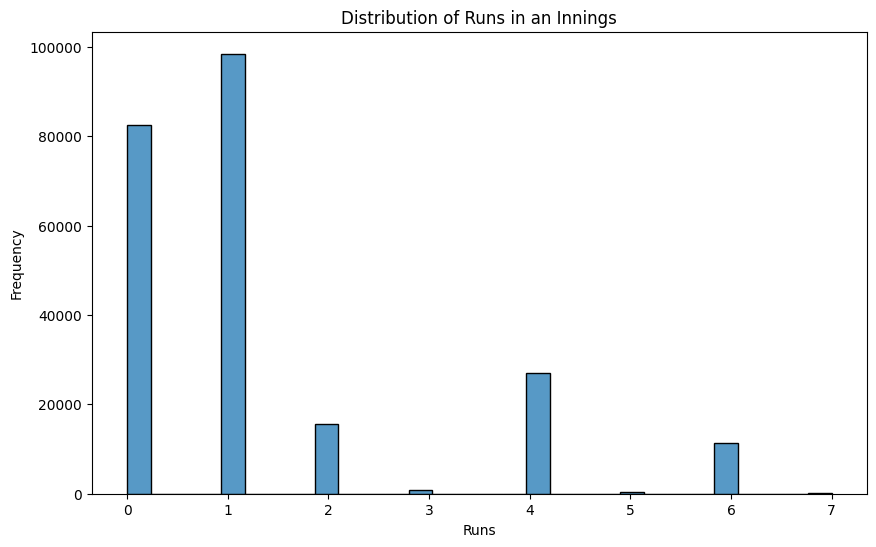

In [ ]:
#Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaning['runs'], bins=30)
plt.title("Distribution of Runs in an Innings")
plt.xlabel("Runs")
plt.ylabel("Frequency")
plt.show()

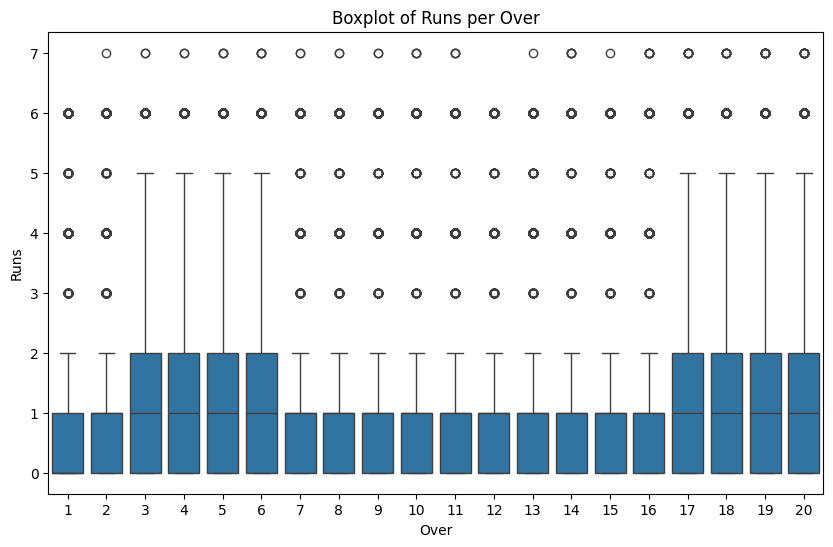

In [ ]:
#Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaning, x='over', y='runs')
plt.title("Boxplot of Runs per Over")
plt.xlabel("Over")
plt.ylabel("Runs")
plt.show()

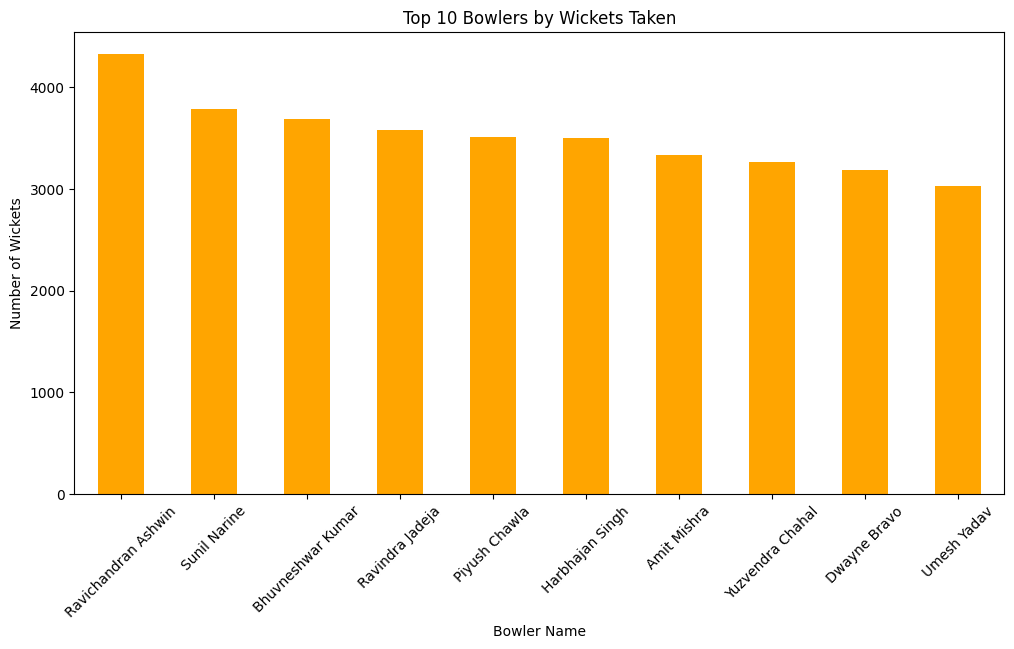

In [ ]:
#Barplot
top_bowlers = df_cleaning['bowler1_name'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
top_bowlers.plot(kind='bar', color='orange')
plt.title("Top 10 Bowlers by Wickets Taken")
plt.xlabel("Bowler Name")
plt.ylabel("Number of Wickets")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Barplot
top_batsmen = df_cleaning.groupby('batsman1_name')['batsman1_runs'].sum().nlargest(10)
fig = px.bar(top_batsmen, x=top_batsmen.index, y=top_batsmen.values, labels={'x': 'Batsman', 'y': 'Runs'},
             title="Top 10 Batsmen by Runs Scored")
fig.update_xaxes(title="Batsman")
fig.update_yaxes(title="Runs Scored")
fig.show()

In [ ]:
#Pie chart
fig = px.pie(df_cleaning, names='isBoundary', title='Boundary vs Non-Boundary Balls', color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

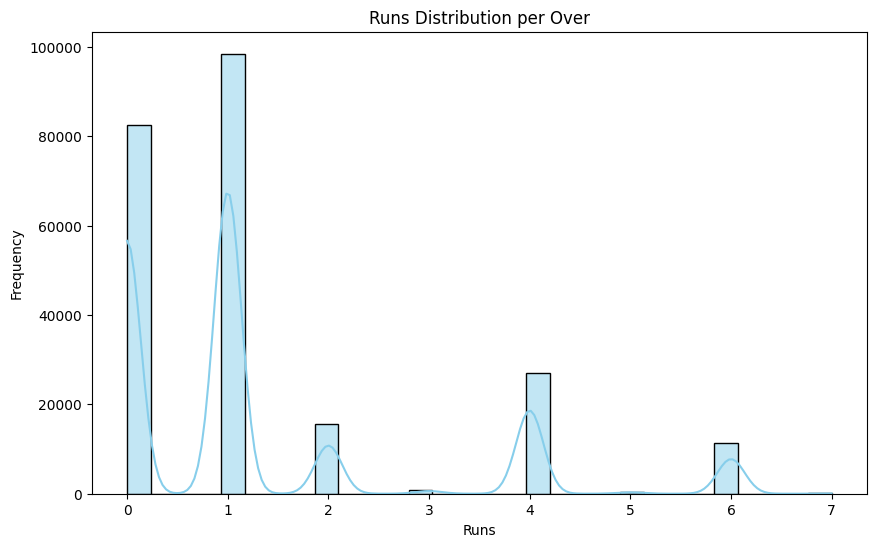

In [ ]:
#Histplot
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaning['runs'], kde=True, bins=30, color='skyblue')
plt.title("Runs Distribution per Over")
plt.xlabel("Runs")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#LIne plot
season_runs = df_cleaning.groupby('season')['runs'].mean().reset_index()
fig = px.line(season_runs, x='season', y='runs', title="Average Runs per Season")
fig.update_xaxes(title="Season")
fig.update_yaxes(title="Average Runs")
fig.show()

In [ ]:
#Scatter
fig = px.scatter(df_cleaning, x='runs', y='wicket_id', color='current_innings', title="Runs vs Wickets by Innings",
                 labels={'runs': 'Runs', 'wicket_id': 'Wickets'})
fig.show()

In [ ]:
#Scatter
fig = px.scatter(df_cleaning, x='over', y='runs',color='current_innings' , title="Runs per Over by Team")
fig.update_xaxes(title="Over")
fig.update_yaxes(title="Runs")
fig.show()

In [ ]:
#Scatter
fig = px.scatter(df_cleaning, x='batsman1_balls', y='runs', color='batsman1_name', title="Runs vs Balls Faced by Batsmen")
fig.update_xaxes(title="Balls Faced")
fig.update_yaxes(title="Runs")
fig.show()

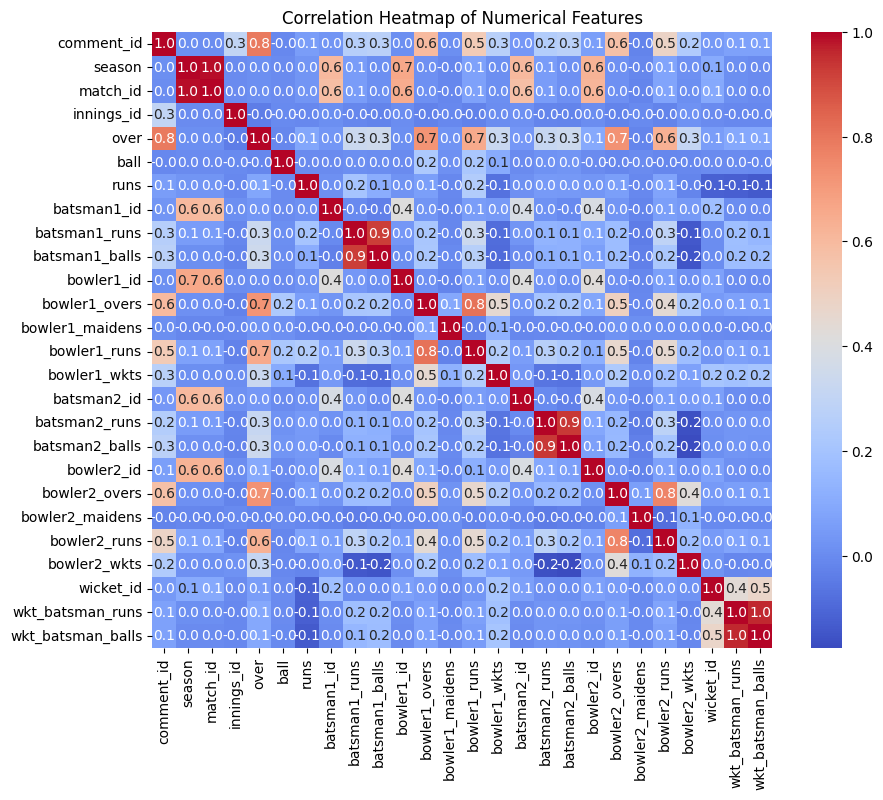

In [ ]:
#Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaning.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm', fmt=".1f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# ***-06 Feature-Engineering***

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
final_data = df_cleaning
final_data.head()

comment_id  season  match_id match_name home_team away_team  \
0         110  2023.0   1359475   GT v CSK        GT       CSK   
1         120  2023.0   1359475   GT v CSK        GT       CSK   
2         130  2023.0   1359475   GT v CSK        GT       CSK   
3         140  2023.0   1359475   GT v CSK        GT       CSK   
4         150  2023.0   1359475   GT v CSK        GT       CSK   

  current_innings  innings_id  over  ball  runs  \
0             CSK           1     1     1     0   
1             CSK           1     1     2     1   
2             CSK           1     1     3     0   
3             CSK           1     1     4     1   
4             CSK           1     1     5     0   

                             shortText  isBoundary  isWide  isNoball  \
0     Mohammed Shami to Conway, no run       False   False     False   
1  Mohammed Shami to Conway, 1 leg bye       False   False     False   
2    Mohammed Shami to Gaikwad, no run       False   False     False   
3     Mohammed Shami to Gaikwad, 1 run       False   False     False   
4     Mohammed Shami to Conway, no run       False   False     False   

   batsman1_id    batsman1_name  batsman1_runs  batsman1_balls  bowler1_id  \
0       379140     Devon Conway              0               1      481896   
1       379140     Devon Conway              0               2      481896   
2      1060380  Ruturaj Gaikwad              0               1      481896   
3      1060380  Ruturaj Gaikwad              1               2      481896   
4       379140     Devon Conway              0               3      481896   

     bowler1_name  bowler1_overs  bowler1_maidens  bowler1_runs  bowler1_wkts  \
0  Mohammed Shami            0.1                0             0             0   
1  Mohammed Shami            0.2                0             0             0   
2  Mohammed Shami            0.3                0             0             0   
3  Mohammed Shami            0.4                0             1             0   
4  Mohammed Shami            0.5                0             1             0   

   batsman2_id    batsman2_name  batsman2_runs  batsman2_balls  bowler2_id  \
0    1060380.0  Ruturaj Gaikwad              0               0         0.0   
1    1060380.0  Ruturaj Gaikwad              0               0         0.0   
2     379140.0     Devon Conway              0               2         0.0   
3     379140.0     Devon Conway              0               2         0.0   
4    1060380.0  Ruturaj Gaikwad              1               2         0.0   

  bowler2_name  bowler2_overs  bowler2_maidens  bowler2_runs  bowler2_wkts  \
0          NaN            NaN              NaN           NaN           NaN   
1          NaN            NaN              NaN           NaN           NaN   
2          NaN            NaN              NaN           NaN           NaN   
3          NaN            NaN              NaN           NaN           NaN   
4          NaN            NaN              NaN           NaN           NaN   

   wicket_id wkt_batsman_name wkt_bowler_name  wkt_batsman_runs  \
0        0.0                                                0.0   
1        0.0                                                0.0   
2        0.0                                                0.0   
3        0.0                                                0.0   
4        0.0                                                0.0   

   wkt_batsman_balls wkt_text isRetiredHurt  
0                0.0                  False  
1                0.0                  False  
2                0.0                  False  
3                0.0                  False  
4                0.0                  False

In [ ]:
final_data['bowler2_name'].fillna("Unknown", inplace=True)
final_data['bowler2_overs'].fillna(0, inplace=True)
final_data['bowler2_maidens'].fillna(0, inplace=True)
final_data['bowler2_runs'].fillna(0, inplace=True)
final_data['bowler2_wkts'].fillna(0, inplace=True)

<ipython-input-122-cb83f044fec6>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-122-cb83f044fec6>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

In [ ]:
final_data.columns

Index(['comment_id', 'season', 'match_id', 'match_name', 'home_team',
       'away_team', 'current_innings', 'innings_id', 'over', 'ball', 'runs',
       'shortText', 'isBoundary', 'isWide', 'isNoball', 'batsman1_id',
       'batsman1_name', 'batsman1_runs', 'batsman1_balls', 'bowler1_id',
       'bowler1_name', 'bowler1_overs', 'bowler1_maidens', 'bowler1_runs',
       'bowler1_wkts', 'batsman2_id', 'batsman2_name', 'batsman2_runs',
       'batsman2_balls', 'bowler2_id', 'bowler2_name', 'bowler2_overs',
       'bowler2_maidens', 'bowler2_runs', 'bowler2_wkts', 'wicket_id',
       'wkt_batsman_name', 'wkt_bowler_name', 'wkt_batsman_runs',
       'wkt_batsman_balls', 'wkt_text', 'isRetiredHurt', 'cumulative_runs'],
      dtype='object')

In [ ]:
final_data['season'].fillna(2023, inplace=True)

<ipython-input-79-b984c0d98c14>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
final_ds=final_data[['season','match_id','innings_id', 'batsman1_name','home_team', 'away_team', 'current_innings',
                      'over', 'ball', 'runs', 'wicket_id',
                      'wkt_batsman_runs']].copy()

In [ ]:
final_ds.head()

season  match_id  innings_id    batsman1_name home_team away_team  \
0  2023.0   1359475           1     Devon Conway        GT       CSK   
1  2023.0   1359475           1     Devon Conway        GT       CSK   
2  2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   
3  2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   
4  2023.0   1359475           1     Devon Conway        GT       CSK   

  current_innings  over  ball  runs  wicket_id  wkt_batsman_runs  
0             CSK     1     1     0        0.0               0.0  
1             CSK     1     2     1        0.0               0.0  
2             CSK     1     3     0        0.0               0.0  
3             CSK     1     4     1        0.0               0.0  
4             CSK     1     5     0        0.0               0.0

In [ ]:
#Calculate wickets lost
final_ds['wickets_lost'] = final_ds.groupby(['match_id', 'current_innings'])['wkt_batsman_runs']\
                                                 .transform(lambda x: (x != 0).cumsum())

In [ ]:
#Calculate total runs for each match and innings
final_ds['cumulative_runs'] = final_ds.groupby(['match_id', 'current_innings'])['runs'].cumsum()

In [ ]:
#Calculate run rate
final_ds['run_rate'] = final_ds['cumulative_runs'] / (final_ds['over'] + 0.1)

In [ ]:
final_ds.drop(columns=['total_runs','wickets'],inplace=True)

In [ ]:
final_ds.head(50)

season  match_id  innings_id    batsman1_name home_team away_team  \
0   2023.0   1359475           1     Devon Conway        GT       CSK   
1   2023.0   1359475           1     Devon Conway        GT       CSK   
2   2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   
3   2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   
4   2023.0   1359475           1     Devon Conway        GT       CSK   
5   2023.0   1359475           1     Devon Conway        GT       CSK   
6   2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   
7   2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   
8   2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   
9   2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   
10  2023.0   1359475           1     Devon Conway        GT       CSK   
11  2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   
12  2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   
13  2023.0   1359475           1     Devon Conway        GT       CSK   
14  2023.0   1359475           1        Moeen Ali        GT       CSK   
15  2023.0   1359475           1        Moeen Ali        GT       CSK   
16  2023.0   1359475           1        Moeen Ali        GT       CSK   
17  2023.0   1359475           1        Moeen Ali        GT       CSK   
18  2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   
19  2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   
20  2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   
21  2023.0   1359475           1        Moeen Ali        GT       CSK   
22  2023.0   1359475           1        Moeen Ali        GT       CSK   
23  2023.0   1359475           1        Moeen Ali        GT       CSK   
24  2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   
25  2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   
26  2023.0   1359475           1        Moeen Ali        GT       CSK   
27  2023.0   1359475           1        Moeen Ali        GT       CSK   
28  2023.0   1359475           1        Moeen Ali        GT       CSK   
29  2023.0   1359475           1        Moeen Ali        GT       CSK   
30  2023.0   1359475           1        Moeen Ali        GT       CSK   
31  2023.0   1359475           1        Moeen Ali        GT       CSK   
32  2023.0   1359475           1        Moeen Ali        GT       CSK   
33  2023.0   1359475           1        Moeen Ali        GT       CSK   
34  2023.0   1359475           1        Moeen Ali        GT       CSK   
35  2023.0   1359475           1        Moeen Ali        GT       CSK   
36  2023.0   1359475           1       Ben Stokes        GT       CSK   
37  2023.0   1359475           1       Ben Stokes        GT       CSK   
38  2023.0   1359475           1       Ben Stokes        GT       CSK   
39  2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   
40  2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   
41  2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   
42  2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   
43  2023.0   1359475           1       Ben Stokes        GT       CSK   
44  2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   
45  2023.0   1359475           1       Ben Stokes        GT       CSK   
46  2023.0   1359475           1       Ben Stokes        GT       CSK   
47  2023.0   1359475           1    Ambati Rayudu        GT       CSK   
48  2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   
49  2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   

    current_innings  over  ball  runs  wicket_id  wkt_batsman_runs  \
0                 5     1     1     0        0.0               0.0   
1                 5     1     2     1        0.0               0.0   
2                 5     1     3     0        0.0               0.0   


In [ ]:
print(final_ds['wickets_lost'].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [ ]:
teams_in_ipl = pd.concat([final_ds['home_team'], final_ds['away_team']]).unique().tolist()

In [ ]:
teams_in_ipl

['GT',
 'PBKS',
 'LSG',
 'SRH',
 'RCB',
 'CSK',
 'DC',
 'RR',
 'KKR',
 'MI',
 'KXIP',
 'RPS',
 'GL',
 'PWI',
 'Kochi']

In [ ]:
teams_mapped = {team: idx for idx, team in enumerate(teams_in_ipl)}

In [ ]:
print(teams_mapped)

{'GT': 0, 'PBKS': 1, 'LSG': 2, 'SRH': 3, 'RCB': 4, 'CSK': 5, 'DC': 6, 'RR': 7, 'KKR': 8, 'MI': 9, 'KXIP': 10, 'RPS': 11, 'GL': 12, 'PWI': 13, 'Kochi': 14}


In [ ]:
final_ds['home_teams'] = final_ds['home_team'].map(teams_mapped)
final_ds['away_teams'] = final_ds['away_team'].map(teams_mapped)

In [ ]:
print(final_ds['current_innings'].unique())

['CSK' 'GT' 'PBKS' 'KKR' 'LSG' 'DC' 'RR' 'SRH' 'MI' 'RCB' 'KXIP' 'RPS'
 'GL' 'PWI' 'Kochi']


In [ ]:
final_ds['current_innings'] = final_ds['current_innings'].map(teams_mapped)

In [ ]:
final_ds.head()

season  match_id  innings_id    batsman1_name home_team away_team  \
0  2023.0   1359475           1     Devon Conway        GT       CSK   
1  2023.0   1359475           1     Devon Conway        GT       CSK   
2  2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   
3  2023.0   1359475           1  Ruturaj Gaikwad        GT       CSK   
4  2023.0   1359475           1     Devon Conway        GT       CSK   

   current_innings  over  ball  runs  wicket_id  wkt_batsman_runs  \
0                5     1     1     0        0.0               0.0   
1                5     1     2     1        0.0               0.0   
2                5     1     3     0        0.0               0.0   
3                5     1     4     1        0.0               0.0   
4                5     1     5     0        0.0               0.0   

   cumulative_runs  run_rate  wickets_lost  home_teams  away_teams  
0                0  0.000000             0           0           5  
1                1  0.909091             0           0           5  
2                1  0.909091             0           0           5  
3                2  1.818182             0           0           5  
4                2  1.818182             0           0           5

***Downloading the final datset***

In [ ]:
final_ds.to_csv('modelling_final.csv', index=False)

In [ ]:
from google.colab import files

# Download the CSV file
files.download('modelling_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ***-07 Baseline_Model***

In [1]:
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import numpy as np

In [3]:
model_df = pd.read_csv('modelling_final.csv')

In [4]:
target = 'cumulative_runs'
features = ['over', 'ball','current_innings','home_teams','away_teams','run_rate','wickets_lost']

In [5]:
X = model_df[features]
y = model_df[target]

In [6]:
X

over  ball  current_innings  home_teams  away_teams  run_rate  \
0          1     1                5           0           5  0.000000   
1          1     2                5           0           5  0.909091   
2          1     3                5           0           5  0.909091   
3          1     4                5           0           5  1.818182   
4          1     5                5           0           5  1.818182   
...      ...   ...              ...         ...         ...       ...   
236400     3     4                4          10           4  1.935484   
236401     3     5                4          10           4  3.225806   
236402     3     6                4          10           4  4.516129   
236403     4     1                4          10           4  4.390244   
236404     4     2                4          10           4  5.365854   

        wickets_lost  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
236400             1  
236401             1  
236402             1  
236403             1  
236404             1  

[236405 rows x 7 columns]

In [7]:
y

0          0
1          1
2          1
3          2
4          2
          ..
236400     6
236401    10
236402    14
236403    18
236404    22
Name: cumulative_runs, Length: 236405, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train

over  ball  current_innings  home_teams  away_teams   run_rate  \
107957     2     4               12           9          12   5.714286   
62105     17     3                8           8           7   8.538012   
70927     15     2                3           3           6   6.423841   
219271    13     2                6           3           6   6.259542   
180158    11     6                4           4           9   7.657658   
...      ...   ...              ...         ...         ...        ...   
119879    10     4                3           4           3   9.603960   
103694    12     4                6          12           6   8.595041   
131932    16     6               10          10           5   5.838509   
146867    10     3                9           9           7  10.693069   
121958     8     4                3           4           3  10.123457   

        wickets_lost  
107957             1  
62105              3  
70927              2  
219271             3  
180158             3  
...              ...  
119879             1  
103694             5  
131932             6  
146867             4  
121958             0  

[189124 rows x 7 columns]

In [10]:
X_test

over  ball  current_innings  home_teams  away_teams   run_rate  \
81969      2     2                8           8          10   2.857143   
7687       8     2                8           8           5   5.802469   
202485    16     6                5           8           5   6.397516   
169092    13     3               13          10          13   5.954198   
161505    17     2                6           6           4   7.660819   
...      ...   ...              ...         ...         ...        ...   
163972     5     1                3           3           7   1.764706   
89221      1     2                4          10           4   1.818182   
42896      7     4                9           9           5   9.154930   
12981      2     6                7           8           7  19.047619   
159898    10     6                4          10           4   8.415842   

        wickets_lost  
81969              0  
7687               2  
202485             3  
169092             5  
161505             5  
...              ...  
163972             2  
89221              0  
42896              0  
12981              0  
159898             0  

[47281 rows x 7 columns]

In [11]:
y_train

107957     12
62105     146
70927      97
219271     82
180158     85
         ... 
119879     97
103694    104
131932     94
146867    108
121958     82
Name: cumulative_runs, Length: 189124, dtype: int64

In [12]:
y_test

81969       6
7687       47
202485    103
169092     78
161505    131
         ... 
163972      9
89221       2
42896      65
12981      40
159898     85
Name: cumulative_runs, Length: 47281, dtype: int64

# ***-08 Modeling(Final)***

In [13]:
results = {
    "Model": [],
    "MSE": [],
    "RMSE": [],
    "R² Score": []
}

In [14]:
#function for evaluation metrics
def evaluate_model(name,y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"MSE: {mse:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R² Score: {r2:.3f}")
    results["Model"].append(name)
    results["MSE"].append(mse)
    results["RMSE"].append(rmse)
    results["R² Score"].append(r2)


**Linear Regression**

In [15]:
lr_model = LinearRegression()

In [16]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [17]:
lr_pred = lr_model.predict(X_test)

In [18]:
evaluate_model("Linear Regression",y_test, lr_pred)

MSE: 227.206
RMSE: 15.073
R² Score: 0.907


**K-Nearest Neighbors**

In [19]:
knn_model = KNeighborsRegressor(n_neighbors=5)

In [20]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [21]:
knn_pred = knn_model.predict(X_test)

In [22]:
evaluate_model("K-Nearest Neighbors",y_test, knn_pred)

MSE: 9.431
RMSE: 3.071
R² Score: 0.996


**Decision Tree**

In [23]:
dt_model = DecisionTreeRegressor(random_state=42)

In [24]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [25]:
dt_pred = dt_model.predict(X_test)

In [26]:
evaluate_model("Decision Tree",y_test, dt_pred)

MSE: 0.084
RMSE: 0.290
R² Score: 1.000


**Random Forest**

In [27]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [28]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [29]:
rf_pred = rf_model.predict(X_test)

In [30]:
evaluate_model("Random Forest",y_test, rf_pred)

MSE: 0.072
RMSE: 0.268
R² Score: 1.000


**Extreme Gradient Boost**

In [31]:
from xgboost import XGBRegressor

In [32]:
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

In [33]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [34]:
xgb_pred = xgb_model.predict(X_test)

In [35]:
evaluate_model("XGBoost",y_test, xgb_pred)

MSE: 0.574
RMSE: 0.758
R² Score: 1.000


In [36]:
results_df = pd.DataFrame(results)
print(results_df)

                 Model         MSE       RMSE  R² Score
0    Linear Regression  227.205678  15.073343  0.907022
1  K-Nearest Neighbors    9.430536   3.070918  0.996141
2        Decision Tree    0.084199   0.290170  0.999966
3        Random Forest    0.071934   0.268206  0.999971
4              XGBoost    0.574223   0.757775  0.999765


**Upon the results we can conclude that Random Forest Regressor is the efficient model since it has less mse,rmse and high r2 score**

# ***09-Model_Evaluation***

Evaluating Training set

In [63]:
 from sklearn.metrics import mean_absolute_error, explained_variance_score

In [62]:
train_predictions = rf_model.predict(X_train)

In [51]:
train_mse = mean_squared_error(y_train, train_predictions)

In [52]:
train_rmse = np.sqrt(train_mse)

In [53]:
train_r2 = r2_score(y_train, train_predictions)

In [54]:
train_mae = mean_absolute_error(y_train, train_predictions)

In [56]:
train_explained_variance = explained_variance_score(y_train, train_predictions)

In [57]:
print("Training Set Metrics:")
print(f"MSE: {train_mse:.3f}")
print(f"RMSE: {train_rmse:.3f}")
print(f"MAE: {train_mae:.3f}")
print(f"R² Score: {train_r2:.3f}")
print(f"Explained Variance: {train_explained_variance:.3f}")

Training Set Metrics:
MSE: 0.008
RMSE: 0.092
MAE: 0.004
R² Score: 1.000
Explained Variance: 1.000


Evaluating Testing Set

In [42]:
test_predictions = rf_model.predict(X_test)

In [43]:
test_mse = mean_squared_error(y_test, test_predictions)

In [60]:
test_rmse = np.sqrt(test_mse)

In [44]:
test_r2 = r2_score(y_test, test_predictions)

In [58]:
test_mae = mean_absolute_error(y_test, test_predictions)

In [59]:
test_explained_variance = explained_variance_score(y_test, test_predictions)

In [61]:
print("Test Set Metrics:")
print(f"MSE: {test_mse:.3f}")
print(f"RMSE: {test_rmse:.3f}")
print(f"MAE: {test_mae:.3f}")
print(f"R² Score: {test_r2:.3f}")
print(f"Explained Variance: {test_explained_variance:.3f}")


Test Set Metrics:
MSE: 0.072
RMSE: 0.268
MAE: 0.012
R² Score: 1.000
Explained Variance: 1.000
